In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx
from pprint import pprint

In [2]:

def create_adj_matrix(n):
    graph = networkx.random_regular_graph(2,n)
    adj_matrix = networkx.to_numpy_matrix(graph)

    # Assert is symmetric
    assert np.all(adj_matrix == adj_matrix.T)

    # Assert number of vertices == n and edges == n*2
    assert adj_matrix.shape[0] == n
    assert adj_matrix[adj_matrix==1].shape[1] == n*2
    
    return adj_matrix

In [3]:
def vis_graph(adj_matrix):
    # Visualize adj_matrix
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    plt.imshow(adj_matrix, interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()
    
    G = networkx.from_numpy_matrix(adj_matrix)
    networkx.draw(G, with_labels=1)
    

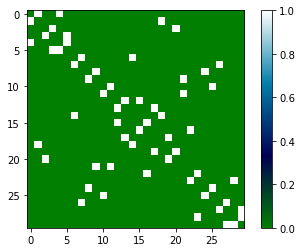

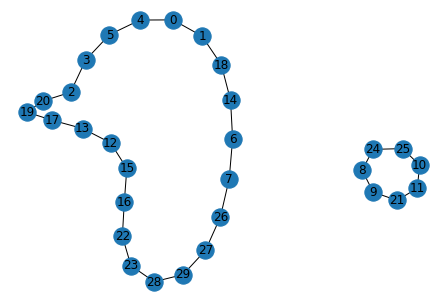

In [4]:
adj_matrix = create_adj_matrix(30)
vis_graph(adj_matrix)

In [5]:
# Convert to adjacency list
from collections import defaultdict 

def convert(a): 
    adj_list = defaultdict(list) 
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
                if a[i,j]== 1.0: 
                    adj_list[i].append(j) 
    return adj_list 

adj_list = convert(adj_matrix)
print(adj_list)
   

defaultdict(<class 'list'>, {0: [1, 4], 1: [0, 18], 2: [3, 20], 3: [2, 5], 4: [0, 5], 5: [3, 4], 6: [7, 14], 7: [6, 26], 8: [9, 24], 9: [8, 21], 10: [11, 25], 11: [10, 21], 12: [13, 15], 13: [12, 17], 14: [6, 18], 15: [12, 16], 16: [15, 22], 17: [13, 19], 18: [1, 14], 19: [17, 20], 20: [2, 19], 21: [9, 11], 22: [16, 23], 23: [22, 28], 24: [8, 25], 25: [10, 24], 26: [7, 27], 27: [26, 29], 28: [23, 29], 29: [27, 28]})


In [6]:
import time
import random
from abc import ABC


class Algo(ABC):
    
    def __init__(self):
        pass
    
    def run_log(self):
        start_time = time.time()
        res = self.run()
        end_time = time.time()-start_time
        print(f"Finished algo {self.__class__.__name__} with {end_time} sec")
        return res, end_time
    
    def run(self):
        pass
    
class DFS(Algo):
    # Finds connected components
    
    def __init__(self, graph):
        self.connected_components = defaultdict(set)
        self.graph = graph
        self.adj_list = convert(graph)
        self.connected = []
        self.connected_list = []
        
    def DFSUtil(self, v, visited): 
  
        # Mark the current node as visited  
        # and print it 
        visited[v] = True
        self.connected.append(v)
  
        # Recur for all the vertices  
        # adjacent to this vertex 
        for i in self.adj_list[v]: 
            if visited[i] == False: 
                self.DFSUtil(i, visited) 
  

    def fillOrder(self,v,visited, stack): 
        # Mark the current node as visited  
        visited[v]= True
        #Recur for all the vertices adjacent to this vertex 
        for i in self.adj_list[v]: 
            if visited[i]==False: 
                self.fillOrder(i, visited, stack) 
        stack = stack.append(v) 
      
  
   
   
    # The main function that finds and prints all strongly 
    # connected components 
    def get_connected_components(self): 
          
        stack = [] 
        self.V = self.graph.shape[0]
        # Mark all the vertices as not visited (For first DFS) 
        visited =[False]*(self.V) 
        # Fill vertices in stack according to their finishing 
        # times 
        for i in range(self.V): 
            if visited[i]==False: 
                self.fillOrder(i, visited, stack) 
  
        # Create a reversed graph 
        gr = DFS(self.graph.T) 
           
        # Mark all the vertices as not visited (For second DFS) 
        visited =[False]*(self.V) 
  
        # Now process all vertices in order defined by Stack 
        while stack: 
            i = stack.pop() 
            if visited[i]==False: 
                gr.DFSUtil(i, visited) 
                gr.connected_list.append(gr.connected)
                gr.connected = []
        return gr.connected_list
                
                
    def run(self):
        cl = self.get_connected_components()
        return cl

class BFS(Algo):
    
    
    def __init__(self, graph):
        self.connected_components = defaultdict(set)
        self.graph = graph
        self.adj_list = convert(graph)

    
    def bfs(self,start, end):
        queue = [[start]]
        visited = set()

        while queue:
            # Gets the first path in the queue
            path = queue.pop(0)

            # Gets the last node in the path
            vertex = path[-1]

            # Checks if we got to the end
            if vertex == end:
                return path
            # We check if the current node is already in the visited nodes set in order not to recheck it
            elif vertex not in visited:
                # enumerate all adjacent nodes, construct a new path and push it into the queue
                for current_neighbour in self.adj_list.get(vertex, []):
                    new_path = list(path)
                    new_path.append(current_neighbour)
                    queue.append(new_path)

                # Mark the vertex as visited
                visited.add(vertex)
    
    def run(self):
        start, end = random.randint(0,self.graph.shape[0]-1),random.randint(0,self.graph.shape[0]-1)
        path = self.bfs(start,end)
        print(f"Path for start {start} and end {end} is {path}")

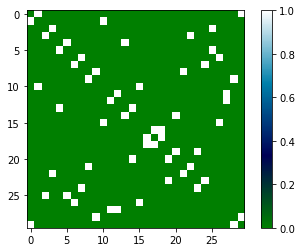

Finished algo DFS with 0.0011126995086669922 sec
Connected components [[16, 17, 18], [11, 12, 27], [0, 1, 10, 15, 26, 6, 7, 24, 23, 19, 20, 14, 13, 4, 5, 25, 2, 3, 22, 21, 8, 9, 28, 29]]
--------------------------------------------------





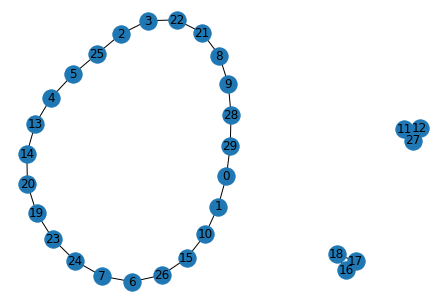

In [7]:
# Try with 30 to see if it works
adj_matrix = create_adj_matrix(30)
vis_graph(adj_matrix)


dfs = DFS(adj_matrix)
res, algo_time = dfs.run_log()
print(f"Connected components {res}")
print('-'*50+'\n'*3)



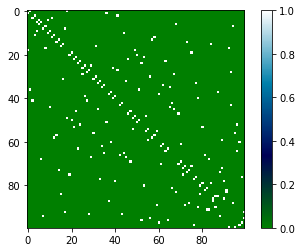

Finished algo DFS with 0.005174160003662109 sec
Connected components [[25, 26, 39, 40, 78, 90, 86, 85, 87, 37, 38, 60, 97, 98, 76, 77, 33, 32, 45, 67, 29], [23, 24, 52, 96, 64, 63], [2, 3, 11, 12, 58, 57, 13, 14, 73, 74, 88, 94, 7, 8, 17, 92, 99, 95, 56, 30, 31, 16, 15, 84, 79, 80, 53, 21, 22, 46, 47, 69, 70, 61, 62, 34, 35, 65, 44, 10, 9, 4, 5, 6, 68, 83, 91, 82, 81, 66, 42, 43, 93, 28, 27, 41], [0, 1, 36, 51, 50, 20, 19, 75, 71, 72, 89, 59, 55, 54, 48, 49, 18]]
--------------------------------------------------





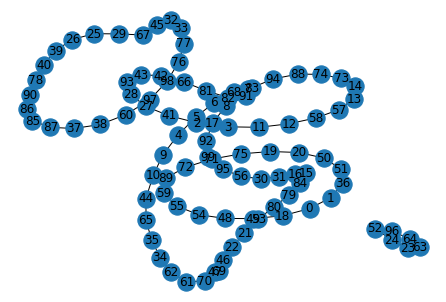

In [8]:
# 100 as in task
adj_matrix = create_adj_matrix(100)
vis_graph(adj_matrix)


dfs = DFS(adj_matrix)
res, algo_time = dfs.run_log()
print(f"Connected components {res}")
print('-'*50+'\n'*3)



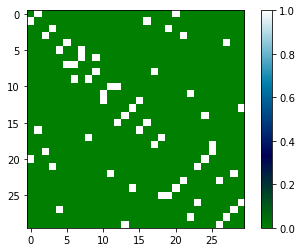

Path for start 18 and end 10 is [18, 17, 8, 9, 6, 7, 5, 4, 27, 28, 22, 11, 10]
Finished algo BFS with 8.130073547363281e-05 sec
--------------------------------------------------





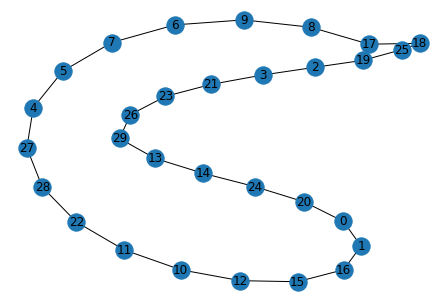

In [9]:

# Try with 30 to see if it works
adj_matrix = create_adj_matrix(30)
vis_graph(adj_matrix)


bfs = BFS(adj_matrix)
res, algo_time = bfs.run_log()
print('-'*50+'\n'*3)

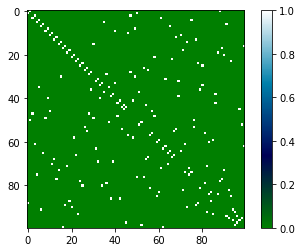

Path for start 54 and end 45 is [54, 43, 44, 45]
Finished algo BFS with 6.246566772460938e-05 sec
--------------------------------------------------





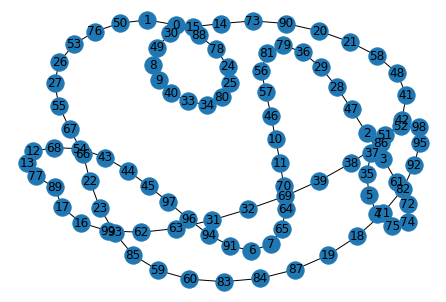

In [12]:

# 100 as in task
adj_matrix = create_adj_matrix(100)
vis_graph(adj_matrix)


bfs = BFS(adj_matrix)
res, algo_time = bfs.run_log()
print('-'*50+'\n'*3)